In [1]:
import numpy as np
import pandas as pd
import math
import os
import sys


nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


In [2]:
data_df = pd.read_csv('../data/transaction_20191111.csv')
data_df

,created_at,order_sn,name,sku,quantity,state,brand,Kho
0,2019-10-31,19A31WD492,Tã quần GOO.N PREMIUM SLIM M56 (7kg ~ 12kg) (5...,190904351,1.0,Tỉnh Đắk Nông,Goon Premium,Kho Đà Nẵng
1,2019-10-31,19A31WE496,Tã quần Moony Bé Trai XL38 (38 Miếng),190900739,3.0,Thành phố Hồ Chí Minh,Moony,Kho Bình Dương
2,2019-10-31,19A31WB945,Tã Quần Moony Bé Gái Gói Đại L(44 Miếng),190900737,3.0,Tỉnh Quảng Ninh,Moony,Kho Hà Nội
3,2019-10-31,19A31WB544,Tã Dán Moony Gói Đại L54 (54 Miếng),190900738,1.0,Thành phố Hà Nội,Moony,Kho Hà Nội
4,2019-10-31,19A31WE492,Tã Dán Huggies Dry Gói Cực Đại M76 (76 Miếng),190900725,1.0,Tỉnh Điện Biên,Huggies,Kho Hà Nội
5,2019-10-31,19A31WD644,Tã dán Merries size S 82 miếng (cho bé 4 - 8kg),190903796,1.0,Thành phố Hà Nội,Merries,Kho Hà Nội
6,2019-10-31,19A31WE751,Tã dán Merries Newborn 90 miếng (cho bé ~ 5kg),190903795,1.0,Thành phố Hà Nội,Merries,Kho Hà Nội
7,2019-10-25,19A25WB746,Tã dán Merries size M 64 miếng (cho bé 6-11kg),190903794,1.0,Tỉnh Lào Cai,Merries,Kho Hà Nội
8,2019-10-25,19A25WA034,Tã Dán Moony Gói Đại M64 (64 Miếng),190900733,6.0,Tỉnh Hà Nam,Moony,Kho Hà Nội
9,2019-10-25,19A25WA466,Tã Quần Moony Bé Gái Gói Đại XL (38 Miếng),190900741,6.0,Tỉnh Gia Lai,Moony,Kho Đà Nẵng


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 8 columns):
created_at    3136 non-null object
order_sn      3136 non-null object
name          3136 non-null object
sku           3136 non-null int64
quantity      3136 non-null float64
state         3136 non-null object
brand         3136 non-null object
Kho           3136 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 196.1+ KB


In [4]:
data_df['created_at'] = pd.to_datetime(data_df['created_at'])

In [5]:
new_data_df = data_df.set_index('created_at').sort_values('created_at')
new_data_df

,order_sn,name,sku,quantity,state,brand,Kho
created_at,,,,,,,
2019-09-25,19925WA030,Tã quần Merries size L 44 miếng (cho bé 9~14kg),190903798,1.0,Tỉnh Bình Dương,Merries,Kho Bình Dương
2019-09-25,19925WA020,Tã quần Merries size L 44 miếng (cho bé 9~14kg),190903798,1.0,Tỉnh Thái Bình,Merries,Kho Hà Nội
2019-09-25,19925WA025,Tã dán Merries size M 64 miếng (cho bé 6-11kg),190903794,1.0,Thành phố Hà Nội,Merries,Kho Hà Nội
2019-09-25,19925WA017,Tã dán Merries size S 82 miếng (cho bé 4 - 8kg),190903796,2.0,Tỉnh Phú Yên,Merries,Kho Đà Nẵng
2019-09-25,19925WA027,Tã quần Merries size M 58 miếng (cho bé 6-11kg),190903799,1.0,Tỉnh Hà Nam,Merries,Kho Hà Nội
2019-09-25,19925WA023,Tã dán Merries size L 54 miếng (cho bé 9-14kg),190903793,1.0,Tỉnh Bình Thuận,Merries,Kho Đà Nẵng
2019-09-25,19925WA024,Tã quần Merries size M 58 miếng (cho bé 6-11kg),190903799,2.0,Tỉnh Bình Định,Merries,Kho Đà Nẵng
2019-09-25,19925WA029,Tã quần Merries size XL 38 miếng (cho bé 12 - ...,190903800,1.0,Thành phố Hà Nội,Merries,Kho Hà Nội
2019-09-25,19925WA019,Tã dán Merries size L 54 miếng (cho bé 9-14kg),190903793,1.0,Thành phố Hồ Chí Minh,Merries,Kho Bình Dương


In [6]:
sku_df = new_data_df.reindex(columns=['name', 'sku']).drop_duplicates().reset_index(drop=True)

def is_gift(s):
    if s[:7] == '4 miếng' or s[:11] == 'Hộp 4 miếng':
        return True
    else:
        return False

In [7]:
gift_idx = sku_df['name'].apply(is_gift)
sku_df = sku_df[~gift_idx]

In [8]:
index = set(new_data_df.index)
index

{Timestamp('2019-09-25 00:00:00'),
 Timestamp('2019-09-26 00:00:00'),
 Timestamp('2019-09-27 00:00:00'),
 Timestamp('2019-09-28 00:00:00'),
 Timestamp('2019-09-29 00:00:00'),
 Timestamp('2019-09-30 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-10-02 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-05 00:00:00'),
 Timestamp('2019-10-06 00:00:00'),
 Timestamp('2019-10-07 00:00:00'),
 Timestamp('2019-10-08 00:00:00'),
 Timestamp('2019-10-09 00:00:00'),
 Timestamp('2019-10-10 00:00:00'),
 Timestamp('2019-10-11 00:00:00'),
 Timestamp('2019-10-12 00:00:00'),
 Timestamp('2019-10-13 00:00:00'),
 Timestamp('2019-10-14 00:00:00'),
 Timestamp('2019-10-15 00:00:00'),
 Timestamp('2019-10-16 00:00:00'),
 Timestamp('2019-10-17 00:00:00'),
 Timestamp('2019-10-18 00:00:00'),
 Timestamp('2019-10-19 00:00:00'),
 Timestamp('2019-10-20 00:00:00'),
 Timestamp('2019-10-21 00:00:00'),
 Timestamp('2019-10-22 00:00:00'),
 Timestamp('2019-10-

In [9]:
data_df.columns

Index(['created_at', 'order_sn', 'name', 'sku', 'quantity', 'state', 'brand',
       'Kho'],
      dtype='object')

In [10]:
def get_sku_name(df, sku):
    idx = df['sku'] == sku
    return df.loc[idx, 'name']

In [11]:
fake_sale_df = pd.DataFrame(columns=['created_at', 'name', 'sku', 'quantity', 'Kho'])
warehouses = ['Kho Hà Nội', 'Kho Bình Dương', 'Kho Đà Nẵng']
counter = 0
for date in index:
    counter += 1
    for i, kho in enumerate(warehouses):
        sku_list = np.random.choice(sku_df['sku'], size=np.random.randint(2 * (3 - i), 10 * (3 - i)))
        for sku in sku_list:
            sale = np.random.randint(1, 2 * (3 - i))
            sale += counter // 5
            sale_info = {
                'created_at': date,
                'name': get_sku_name(sku_df, sku),
                'sku': sku,
                'quantity': sale,
                'Kho': kho
            }
            fake_sale_df = fake_sale_df.append(pd.DataFrame(sale_info))

fake_sale_df

,created_at,name,sku,quantity,Kho
42,2019-10-25,Tã Quần Bobby Fresh Gói Lớn XL32 (32 Miếng),190900718,5,Kho Hà Nội
13,2019-10-25,Tã Dán Sơ Sinh Moony Gói Cực Đại NB90 (90 Miếng),190900740,1,Kho Hà Nội
39,2019-10-25,Tã quần GOO.N PREMIUM SLIM L46 (9kg ~ 14kg) (4...,190904352,2,Kho Hà Nội
78,2019-10-25,Tã dán Merries size S 82 miếng (cho bé 4 - 8kg...,191005018,5,Kho Hà Nội
26,2019-10-25,Tã dán Merries size XL 44 miếng (cho bé 12 - 2...,190903797,2,Kho Hà Nội
44,2019-10-25,Tã quần GOO.N PREMIUM SLIM XXXL26 (18kg ~ 30kg...,190904355,1,Kho Hà Nội
32,2019-10-25,Tã dán Bobby Fresh SM L68 (68 Miếng),190900722,2,Kho Hà Nội
11,2019-10-25,Tã Quần Moony Gói Đại M58 (58 Miếng),190900735,1,Kho Hà Nội
18,2019-10-25,Tã quần Moony Bé Trai XL38 (38 Miếng),190900739,3,Kho Hà Nội
86,2019-10-25,Miếng Lót Jo Newborn 1 (56 Miếng),191006403,3,Kho Hà Nội


In [12]:
fake_sale_df.to_csv('../data/fake_data.csv')

In [13]:
from time_series.data_manager import DataManager
from time_series.models.AutoArima import AutoARIMA

In [14]:
data_manager = DataManager('fake_data.csv')

/home/jovyan/work/time-series/time_series/data_manager.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  self.df = pd.concat([self.excel_data, self.fact_df])


In [15]:
warehouses = ['Hà Nội', 'Bình Dương', 'Đà Nẵng']
dfbyday, _, _, _ = data_manager.aggregate_data()
for warehouse in warehouses:
    dfbyday[warehouse] = data_manager.filter_outlier(warehouse)

In [16]:
models = {}
for warehouse in dfbyday.columns:
    print(f'Fit ARIMA for {warehouse}')
    model = AutoARIMA(dfbyday, warehouse, None)
    models[warehouse] = model

Fit ARIMA for Hà Nội
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=3551.953, BIC=3571.507, Fit time=0.639 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 7); AIC=3796.197, BIC=3804.019, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 7); AIC=3582.213, BIC=3597.856, Fit time=0.361 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 7); AIC=3637.574, BIC=3653.217, Fit time=0.321 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 7); AIC=3550.180, BIC=3573.644, Fit time=0.916 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 7); AIC=3551.802, BIC=3571.356, Fit time=0.671 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 2, 7); AIC=3551.971, BIC=3579.347, Fit time=1.929 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 7); AIC=3550.711, BIC=3566.354, Fit time=0.223 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 0, 2, 7); AIC=3538.651, BIC=3569.938, Fit time=2.165 seconds
Fit ARIMA: order

In [17]:
def get_index_of_forecast(df, period):
    index_of_fc = []
    for day in range(period):
        time_shift = pd.to_timedelta(day + 1, unit='D')
        index_of_fc.append(df.index[-1] + time_shift)
    return index_of_fc
    

In [18]:
forecast_dfs = {}

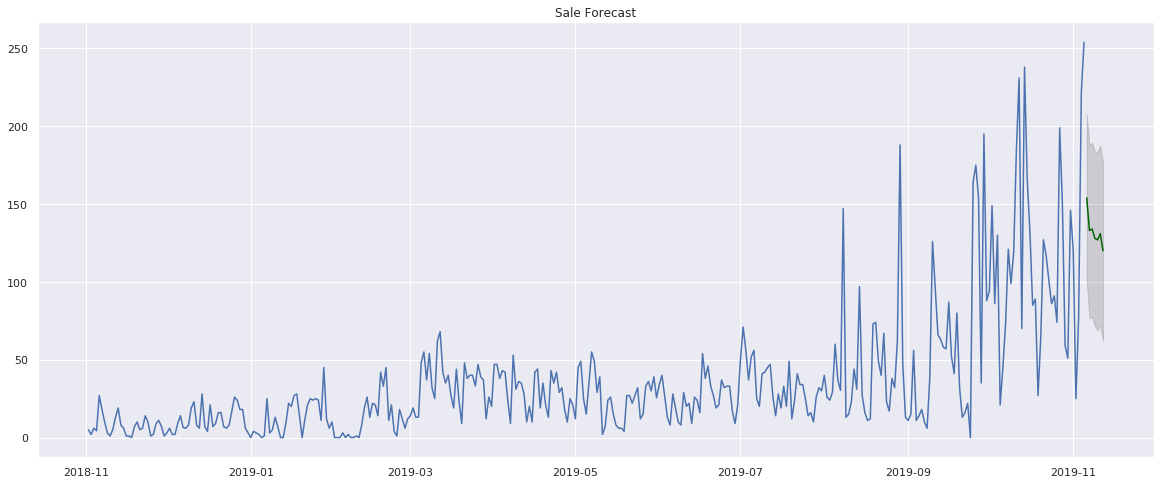

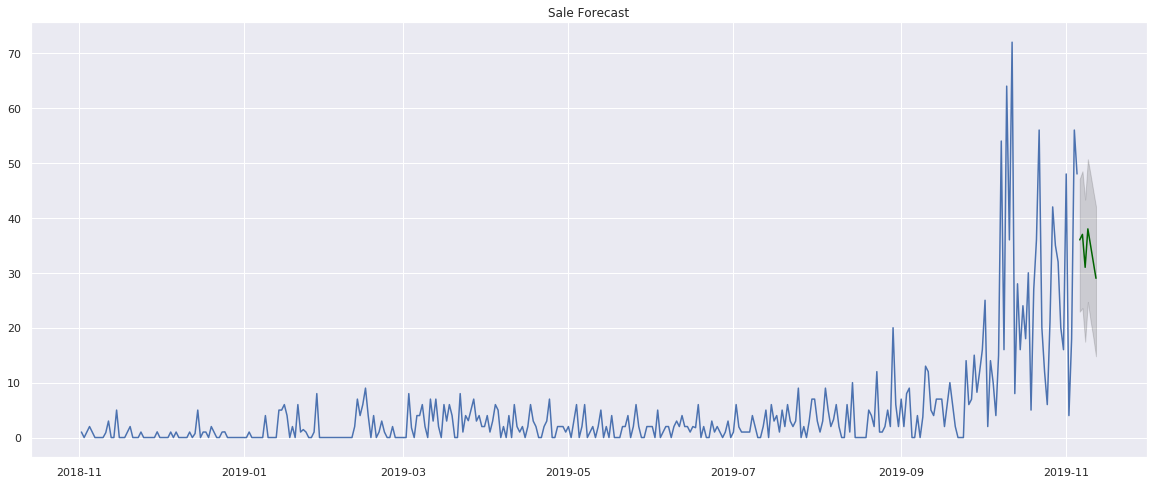

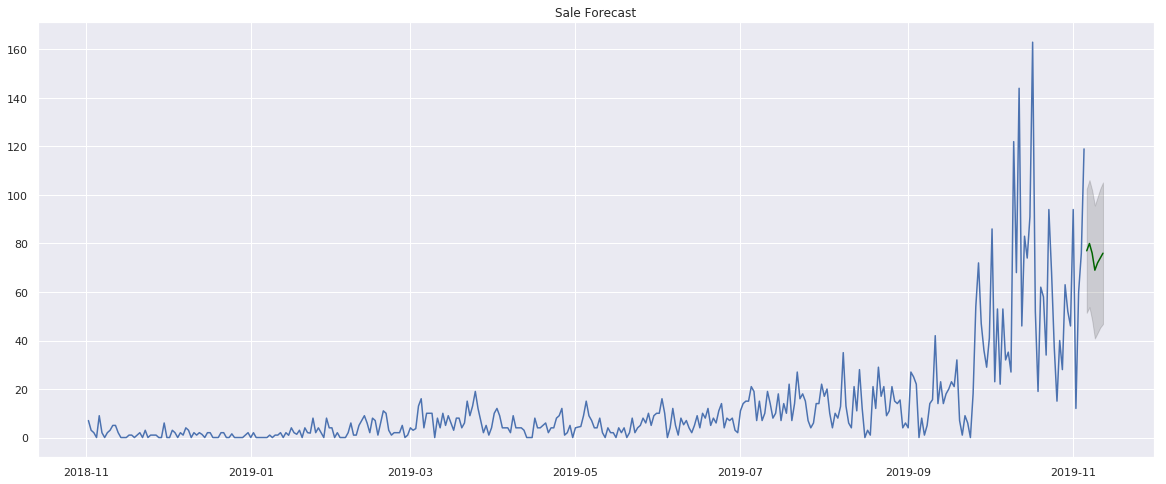

,Hà Nội,Đà Nẵng,Bình Dương,Hà Nội_lower_limit,Đà Nẵng_lower_limit,Bình Dương_lower_limit,Hà Nội_upper_limit,Đà Nẵng_upper_limit,Bình Dương_upper_limit
2019-11-06,154.0,36.0,77.0,100.186890,22.922000,51.422358,207.745500,47.114862,102.502676
2019-11-07,133.0,37.0,80.0,76.555648,23.577280,53.771094,187.801423,48.487894,106.136253
2019-11-08,134.0,31.0,76.0,77.577076,17.451230,48.302046,189.317800,43.333861,101.921263
2019-11-09,128.0,38.0,69.0,71.813859,24.698608,40.810818,183.601561,50.687331,95.655428
2019-11-10,127.0,35.0,72.0,68.769166,21.253227,43.065125,183.680454,47.872067,99.108342
2019-11-11,131.0,32.0,74.0,72.646142,18.206882,45.351860,187.622906,44.936580,102.568579
2019-11-12,120.0,29.0,76.0,61.864780,14.802192,46.801564,176.973785,42.076898,105.168196


In [23]:
period = 7

forecast = {}
conf_int = {}
lower_limit = {}
upper_limit = {}

warehouses = list(models.keys())
for warehouse in warehouses:
    forecast[warehouse], conf_int[warehouse] = models[warehouse].forecast(period)
    models[warehouse].plot_forecast(period, forecast[warehouse], conf_int[warehouse])
    lower_limit[warehouse] = conf_int[warehouse][:, 0]
    upper_limit[warehouse] = conf_int[warehouse][:, 1]
    
forecast_dfs[f'{period}_day'] = pd.DataFrame(forecast, index=get_index_of_forecast(dfbyday, period))
lower_limit_df = pd.DataFrame(lower_limit)
upper_limit_df = pd.DataFrame(upper_limit)
conf_int_df = lower_limit_df.merge(upper_limit_df, left_index=True, right_index=True, suffixes=('_lower_limit', '_upper_limit'))
conf_int_df.index = get_index_of_forecast(dfbyday, period)
forecast_dfs[f'{period}_day'] = forecast_dfs[f'{period}_day'].merge(conf_int_df, left_index=True, right_index=True)
forecast_dfs['7_day']


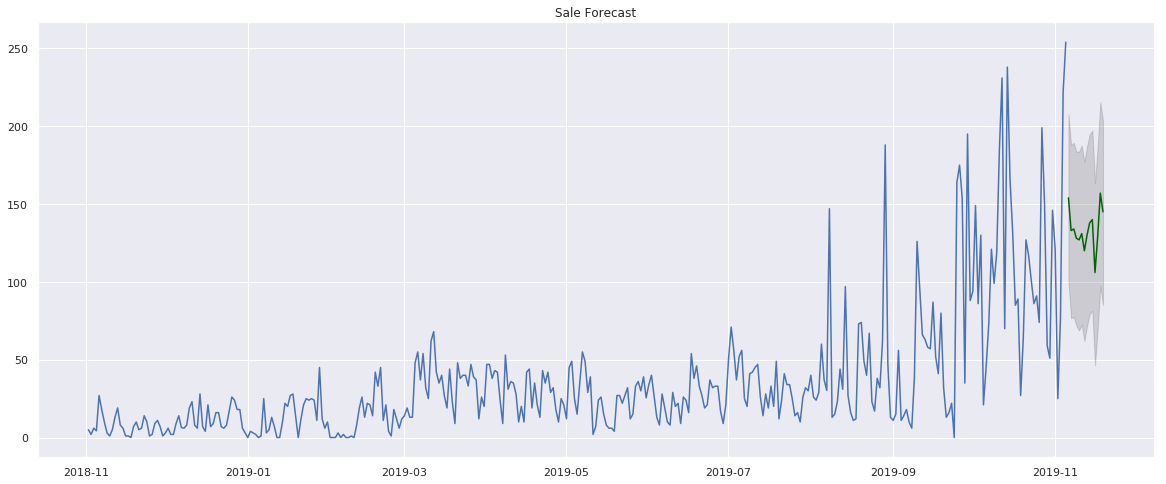

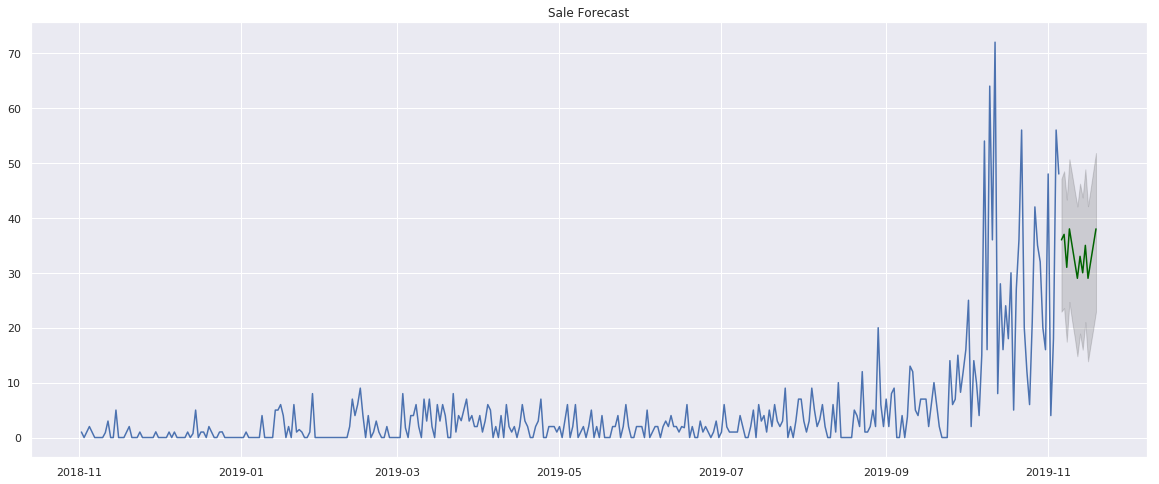

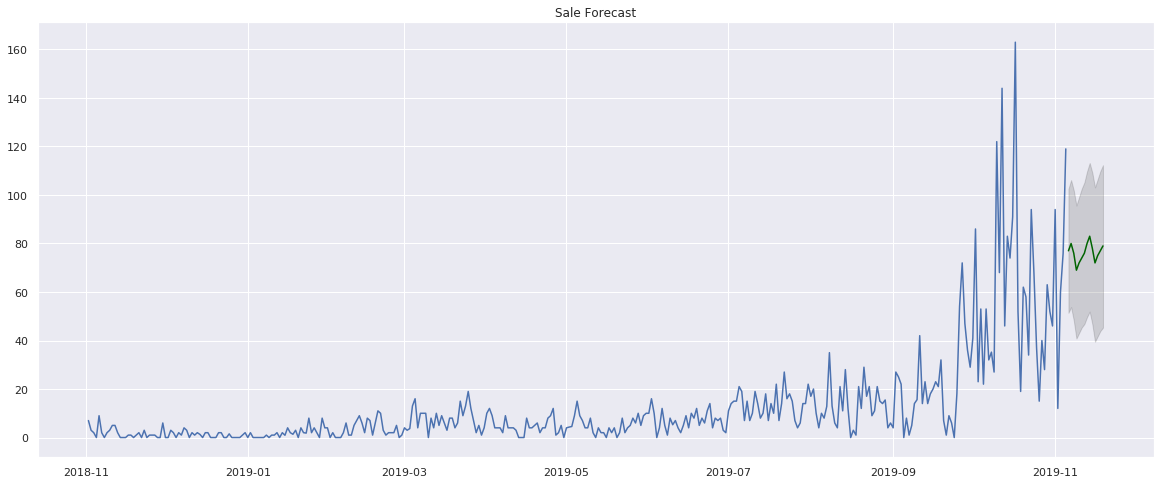

,Hà Nội,Đà Nẵng,Bình Dương,Hà Nội_lower_limit,Đà Nẵng_lower_limit,Bình Dương_lower_limit,Hà Nội_upper_limit,Đà Nẵng_upper_limit,Bình Dương_upper_limit
2019-11-06,154.0,36.0,77.0,100.186890,22.922000,51.422358,207.745500,47.114862,102.502676
2019-11-07,133.0,37.0,80.0,76.555648,23.577280,53.771094,187.801423,48.487894,106.136253
2019-11-08,134.0,31.0,76.0,77.577076,17.451230,48.302046,189.317800,43.333861,101.921263
2019-11-09,128.0,38.0,69.0,71.813859,24.698608,40.810818,183.601561,50.687331,95.655428
2019-11-10,127.0,35.0,72.0,68.769166,21.253227,43.065125,183.680454,47.872067,99.108342
2019-11-11,131.0,32.0,74.0,72.646142,18.206882,45.351860,187.622906,44.936580,102.568579
2019-11-12,120.0,29.0,76.0,61.864780,14.802192,46.801564,176.973785,42.076898,105.168196
2019-11-13,130.0,33.0,80.0,71.718950,18.937816,49.650900,187.130830,46.238693,109.702252
2019-11-14,138.0,30.0,83.0,79.397114,15.996509,51.927221,194.818844,43.720381,113.188362
2019-11-15,140.0,35.0,78.0,81.362636,21.017525,46.693019,197.210725,48.850290,109.140518


In [24]:
period = 14

forecast = {}
conf_int = {}
lower_limit = {}
upper_limit = {}

warehouses = list(models.keys())
for warehouse in warehouses:
    forecast[warehouse], conf_int[warehouse] = models[warehouse].forecast(period)
    models[warehouse].plot_forecast(period, forecast[warehouse], conf_int[warehouse])
    lower_limit[warehouse] = conf_int[warehouse][:, 0]
    upper_limit[warehouse] = conf_int[warehouse][:, 1]
    
forecast_dfs[f'{period}_day'] = pd.DataFrame(forecast, index=get_index_of_forecast(dfbyday, period))
lower_limit_df = pd.DataFrame(lower_limit)
upper_limit_df = pd.DataFrame(upper_limit)
conf_int_df = lower_limit_df.merge(upper_limit_df, left_index=True, right_index=True, suffixes=('_lower_limit', '_upper_limit'))
conf_int_df.index = get_index_of_forecast(dfbyday, period)
forecast_dfs[f'{period}_day'] = forecast_dfs[f'{period}_day'].merge(conf_int_df, left_index=True, right_index=True)
forecast_dfs[f'{period}_day']


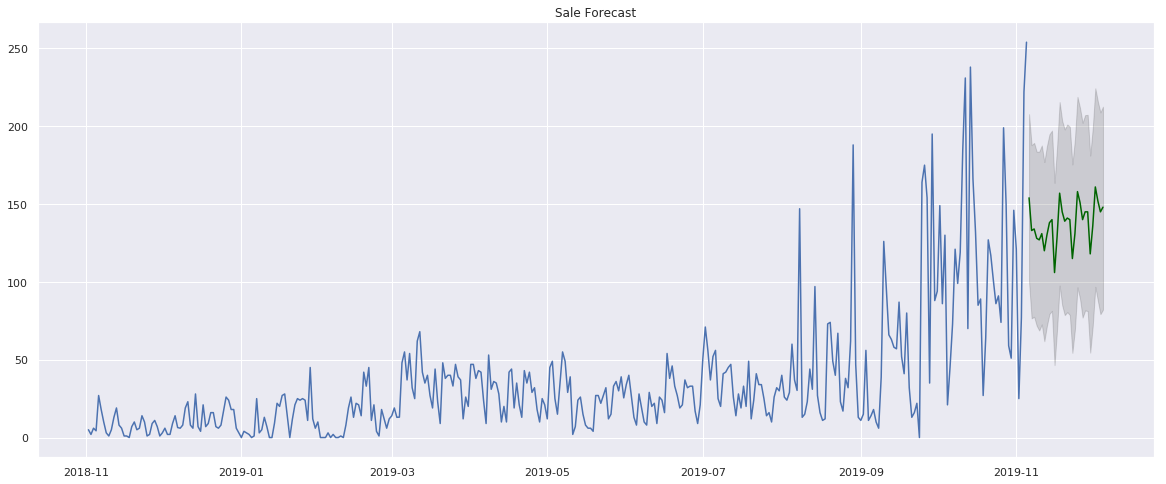

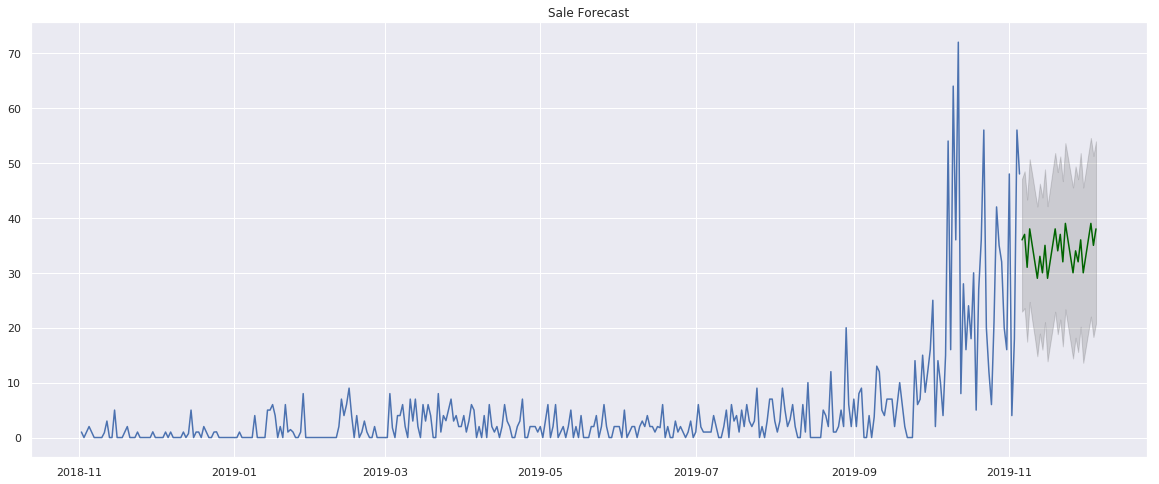

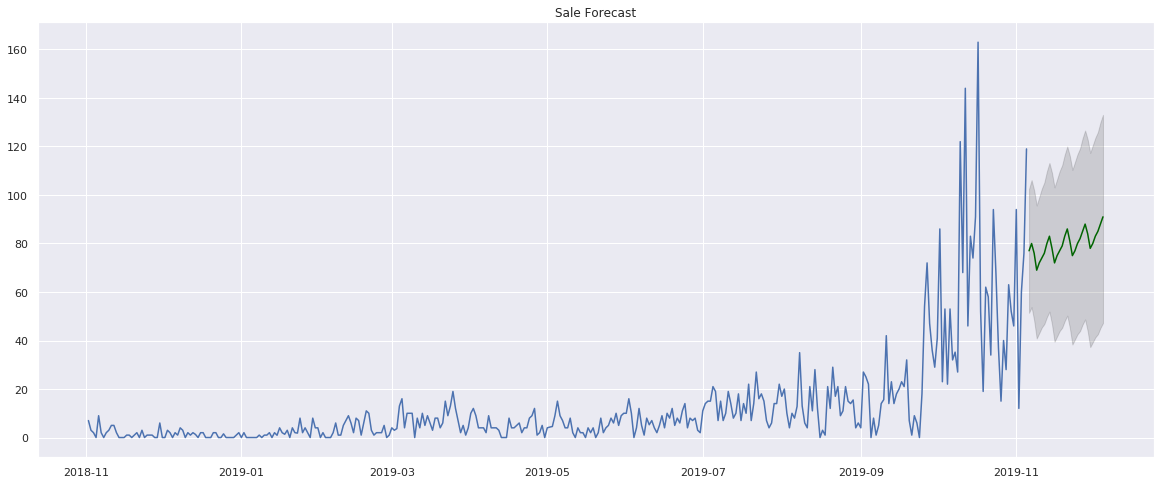

,Hà Nội,Đà Nẵng,Bình Dương,Hà Nội_lower_limit,Đà Nẵng_lower_limit,Bình Dương_lower_limit,Hà Nội_upper_limit,Đà Nẵng_upper_limit,Bình Dương_upper_limit
2019-11-06,154.0,36.0,77.0,100.186890,22.922000,51.422358,207.745500,47.114862,102.502676
2019-11-07,133.0,37.0,80.0,76.555648,23.577280,53.771094,187.801423,48.487894,106.136253
2019-11-08,134.0,31.0,76.0,77.577076,17.451230,48.302046,189.317800,43.333861,101.921263
2019-11-09,128.0,38.0,69.0,71.813859,24.698608,40.810818,183.601561,50.687331,95.655428
2019-11-10,127.0,35.0,72.0,68.769166,21.253227,43.065125,183.680454,47.872067,99.108342
2019-11-11,131.0,32.0,74.0,72.646142,18.206882,45.351860,187.622906,44.936580,102.568579
2019-11-12,120.0,29.0,76.0,61.864780,14.802192,46.801564,176.973785,42.076898,105.168196
2019-11-13,130.0,33.0,80.0,71.718950,18.937816,49.650900,187.130830,46.238693,109.702252
2019-11-14,138.0,30.0,83.0,79.397114,15.996509,51.927221,194.818844,43.720381,113.188362
2019-11-15,140.0,35.0,78.0,81.362636,21.017525,46.693019,197.210725,48.850290,109.140518


In [25]:
period = 30

forecast = {}
conf_int = {}
lower_limit = {}
upper_limit = {}

warehouses = list(models.keys())
for warehouse in warehouses:
    forecast[warehouse], conf_int[warehouse] = models[warehouse].forecast(period)
    models[warehouse].plot_forecast(period, forecast[warehouse], conf_int[warehouse])
    lower_limit[warehouse] = conf_int[warehouse][:, 0]
    upper_limit[warehouse] = conf_int[warehouse][:, 1]
    
forecast_dfs[f'{period}_day'] = pd.DataFrame(forecast, index=get_index_of_forecast(dfbyday, period))
lower_limit_df = pd.DataFrame(lower_limit)
upper_limit_df = pd.DataFrame(upper_limit)
conf_int_df = lower_limit_df.merge(upper_limit_df, left_index=True, right_index=True, suffixes=('_lower_limit', '_upper_limit'))
conf_int_df.index = get_index_of_forecast(dfbyday, period)
forecast_dfs[f'{period}_day'] = forecast_dfs[f'{period}_day'].merge(conf_int_df, left_index=True, right_index=True)
forecast_dfs[f'{period}_day']


In [22]:
keys = list(forecast_dfs.keys())

for key in keys:
    df = forecast_dfs[key]
    start_date = df.index.min().strftime('%Y%m%d')
    end_date = df.index.max().strftime('%Y%m%d')

    file_name = f'forecast_{key}.csv'
    df.to_csv(f'../data/{file_name}')